In [1]:
import pandas as pd
import mlflow
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
client = mlflow.tracking.MlflowClient(tracking_uri="http://localhost:5000")

In [3]:
exp_id = client.get_experiment_by_name("MEK_FAK_ERK").experiment_id
runs = client.search_runs(experiment_ids=exp_id)
runs_df = pd.DataFrame([{ **dict(run.info), **run.data.params, **run.data.metrics} for run in runs])

MlflowException: API request to http://localhost:5000/api/2.0/mlflow/experiments/get-by-name failed with exception HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /api/2.0/mlflow/experiments/get-by-name?experiment_name=MEK_FAK_ERK (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f8af63bf8b0>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [ ]:
runs_df["finished"] = "yes"
runs_df.loc[runs_df["best_val_loss"].isna(), "finished"] = "no"


In [5]:
runs_df["start_time"] = pd.to_datetime(runs_df["start_time"])
runs_df["n_epochs"] = runs_df["n_epochs"].astype(int)
runs_df["learning_rate"] = runs_df["learning_rate"].astype(float)
runs_df["batch_size"] = runs_df["batch_size"].astype(float)

<AxesSubplot: xlabel='finished', ylabel='n_epochs'>

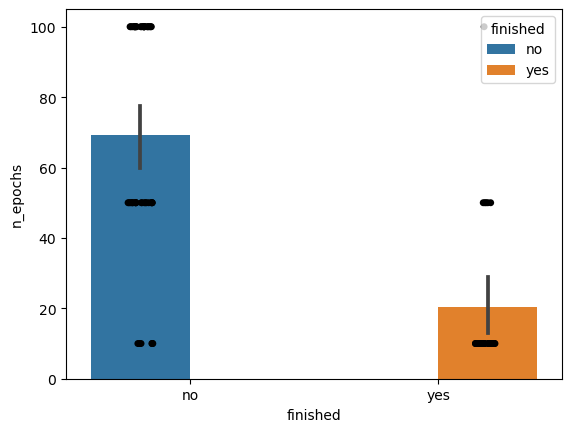

In [6]:
sns.barplot(data=runs_df, y="n_epochs", x="finished", hue="finished", dodge=True)
sns.stripplot(data=runs_df, y="n_epochs", x="finished", hue="finished", dodge=True, 
              palette={"yes": "black", "no": "black"}, legend=False)

<AxesSubplot: xlabel='finished', ylabel='learning_rate'>

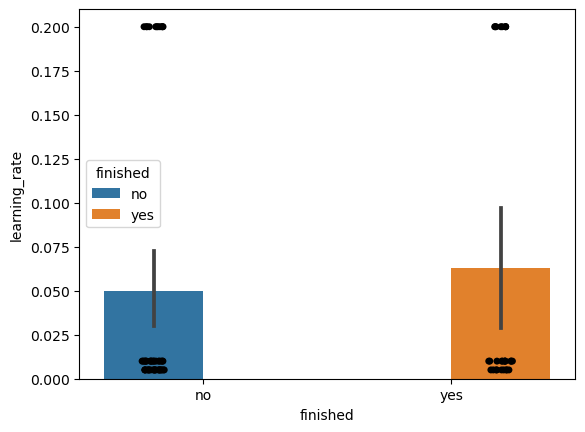

In [7]:
sns.barplot(data=runs_df, y="learning_rate", x="finished", hue="finished", dodge=True)
sns.stripplot(data=runs_df, y="learning_rate", x="finished", hue="finished", dodge=True, 
              palette={"yes": "black", "no": "black"}, legend=False)

<AxesSubplot: xlabel='finished', ylabel='batch_size'>

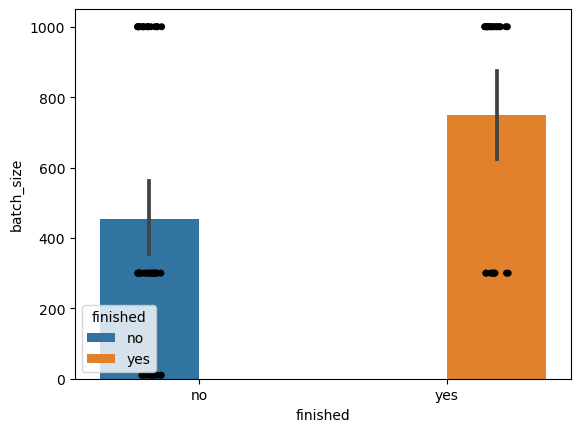

In [8]:
sns.barplot(data=runs_df, y="batch_size", x="finished", hue="finished", dodge=True)
sns.stripplot(data=runs_df, y="batch_size", x="finished", hue="finished", dodge=True, 
              palette={"yes": "black", "no": "black"}, legend=False)